In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Para esta tarea se utilizará el modelo de regresión lineal multiple, este modelo intenta predecir una variable continua (en este caso, daily_vaccinations) a partir de una combinación lineal de varias variables independientes (como total_vaccinations, people_vaccinated, etc.).

Coeficientes: [ 0.00156571  0.01558654 -0.01657244]
Intercepto: 51328.038328497496
Error cuadrático medio (MSE): 61761568171.00914
Raíz del MSE (RMSE): 248518.7481278005
Coeficiente de determinación R²: 0.8520761207698705

Correlación entre variables:
                         daily_vaccinations  total_vaccinations  \
daily_vaccinations                 1.000000            0.762836   
total_vaccinations                 0.762836            1.000000   
people_vaccinated                  0.836689            0.983396   
people_fully_vaccinated            0.691618            0.989002   

                         people_vaccinated  people_fully_vaccinated  
daily_vaccinations                0.836689                 0.691618  
total_vaccinations                0.983396                 0.989002  
people_vaccinated                 1.000000                 0.957378  
people_fully_vaccinated           0.957378                 1.000000  


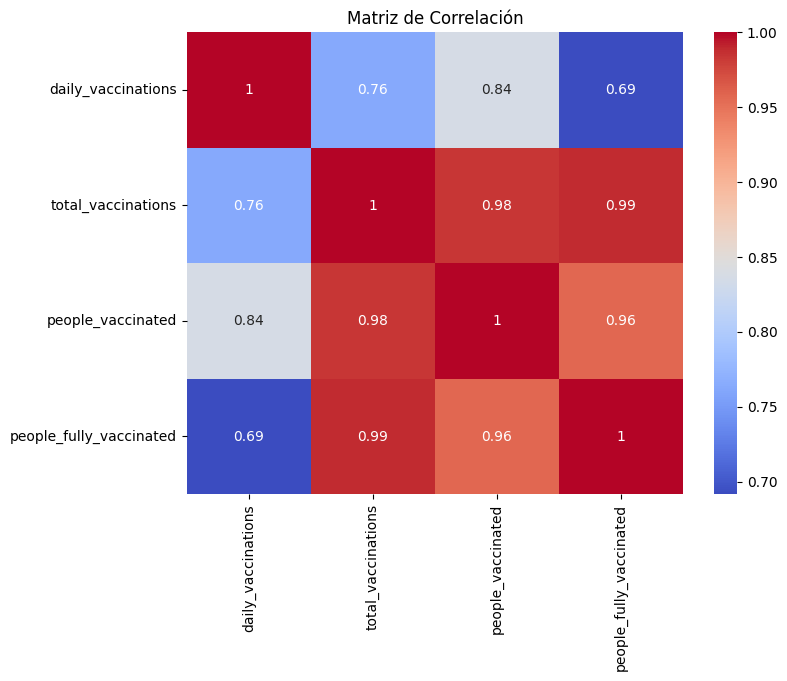

In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar y preparar datos
df = pd.read_csv('/kaggle/input/covid-world-vaccination-progress/country_vaccinations.csv')
df_model = df[['daily_vaccinations', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']].dropna()

X = df_model[['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']]
y = df_model['daily_vaccinations']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicción
y_pred = modelo.predict(X_test)

# Evaluación
print("Coeficientes:", modelo.coef_)
print("Intercepto:", modelo.intercept_)
print("Error cuadrático medio (MSE):", mean_squared_error(y_test, y_pred))
print("Raíz del MSE (RMSE):", mean_squared_error(y_test, y_pred, squared=False))
print("Coeficiente de determinación R²:", r2_score(y_test, y_pred))

# Correlación entre variables
print("\nCorrelación entre variables:")
print(df_model.corr())

# Mapa de calor de correlación
plt.figure(figsize=(8,6))
sns.heatmap(df_model.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()
